In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
train = pd.read_csv(r'D:\kaggle\datasets\digit-recognizer\train.csv')
test  = pd.read_csv(r'D:\kaggle\datasets\digit-recognizer\test.csv')

In [3]:
train.shape

(42000, 785)

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = train.values[:,1:]
Y_train = train.values[:,0]
test=test.values

In [6]:
test.shape

(28000, 784)

In [9]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
# Normalization
X_train = X_train / 255.0
test = test / 255.0

In [10]:
X_train.shape

(42000, 784)

In [11]:
X_train = X_train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

In [12]:
X_train.shape

(42000, 28, 28, 1)

In [13]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

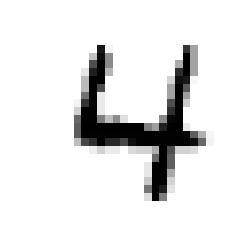

In [14]:
plot_digit(X_train[42])

In [22]:
from keras import layers
from keras import models

model = models.Sequential()
#对于黑白图像（比如 MNIST 数字图像），深度等于 1（表示灰度等级）。
#学到的就是在输入图像的二维小窗口中发现的模式。这些窗口的大小都是 3×3。
#Conv2D(output_depth,(window_height, window_width))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)         

In [24]:
#将 3D 输出展平为 1D，然后在上面添加几个 Dense 层
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)         

In [26]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
random_seed = 42
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [27]:
X_train.shape

(37800, 28, 28, 1)

In [28]:
Y_train.shape

(37800,)

In [29]:

Y_val.shape

(4200,)

In [30]:
X_val.shape

(4200, 28, 28, 1)

In [31]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)

In [35]:
from keras.optimizers import  RMSprop
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [69]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reductions = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 3,
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [40]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # 使输入数据集去中心化（均值为0）, 按feature执行
        samplewise_center=False,  # 使输入数据的每个样本均值为0
        featurewise_std_normalization=False,  # 将输入除以数据集的标准差以完成标准化, 按feature执行
        samplewise_std_normalization=False,  # 将输入的每个样本除以其自身的标准差
        zca_whitening=False,  # 对输入数据施加ZCA白化
        rotation_range=10,  # 数据增强时图片随机转动的角度
        zoom_range = 0.1, # 随机缩放的幅度
        width_shift_range=0.1,  # 图片宽度的某个比例，数据增强时图片水平偏移的幅度
        height_shift_range=0.1,  # 图片高度的某个比例，数据增强时图片竖直偏移的幅度
        horizontal_flip=False,  # 进行随机水平翻转
        vertical_flip=False)  # 进行随机竖直翻转

In [43]:
datagen.fit(X_train)

In [70]:
X_train.shape[0]//100

378

In [72]:
history = model.fit(datagen.flow(X_train,Y_train,batch_size = 100),
                            epochs=30,validation_data=(X_val,Y_val),verbose=1,steps_per_epoch=378,callbacks=[learning_rate_reductions])

Epoch 1/30
378/378 [==============================] - 7s 18ms/step - loss: 0.0797 - accuracy: 0.9756 - val_loss: 0.0309 - val_accuracy: 0.9898
Epoch 2/30
378/378 [==============================] - 7s 18ms/step - loss: 0.0789 - accuracy: 0.9774 - val_loss: 0.0275 - val_accuracy: 0.9914
Epoch 3/30
378/378 [==============================] - 7s 18ms/step - loss: 0.0740 - accuracy: 0.9778 - val_loss: 0.0263 - val_accuracy: 0.9910
Epoch 4/30
378/378 [==============================] - 7s 18ms/step - loss: 0.0717 - accuracy: 0.9790 - val_loss: 0.0265 - val_accuracy: 0.9924
Epoch 5/30
378/378 [==============================] - 7s 18ms/step - loss: 0.0712 - accuracy: 0.9797 - val_loss: 0.0262 - val_accuracy: 0.9912
Epoch 6/30
378/378 [==============================] - 7s 18ms/step - loss: 0.0642 - accuracy: 0.9810 - val_loss: 0.0262 - val_accuracy: 0.9917
Epoch 7/30
376/378 [============================>.] - ETA: 0s - loss: 0.0614 - accuracy: 0.9816
Epoch 00007: ReduceLROnPlateau reducing learni

In [ ]:
#history = model.fit(X_train,Y_train,epochs=5,batch_size=64,validation_data=(X_val,Y_val))

In [115]:
results = model.predict(test)

In [116]:
results = np.argmax(results,axis = 1)

In [117]:
results[1]

0

In [118]:
results = pd.Series(results, name = 'Label')

In [120]:
results.head()

0    2
1    0
2    9
3    9
4    3
Name: Label, dtype: int64

In [121]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [114]:
test.shape

(28000, 28, 28, 1)